In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox,zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
t=pd.read_csv('titanic.csv')
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
t.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
t.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
t.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

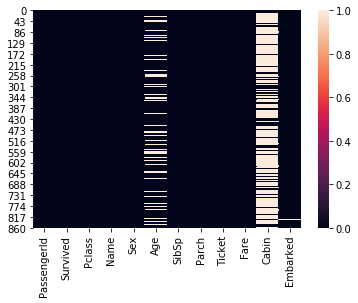

In [7]:
sns.heatmap(t.isnull())

In [8]:
t.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [9]:
t['Age']=t['Age'].fillna(t['Age'].mean())

In [10]:
t['Embarked'].mode()

0    S
dtype: object

In [11]:
t['Embarked']=t['Embarked'].fillna('S')

In [12]:
t.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [13]:
t.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
o=['object']
t.describe(include=o)

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",male,347082,S
freq,1,577,7,646


In [15]:
t.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
t.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C
890,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q


In [17]:
t['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

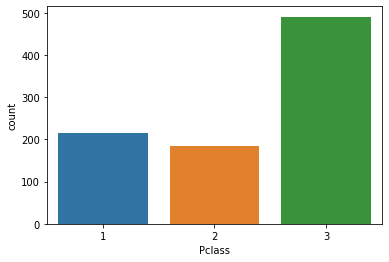

In [18]:
sns.countplot(t['Pclass'])

In [19]:
t['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
t['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

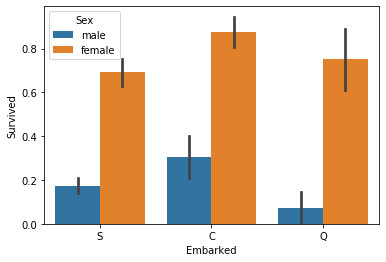

In [21]:
sns.barplot(x='Embarked',y='Survived',hue='Sex', data=t)

In [22]:
t[['Sex','Survived']].groupby(['Sex']).mean()*100
#male and female survivor percentage

,Survived
Sex,
female,74.203822
male,18.890815


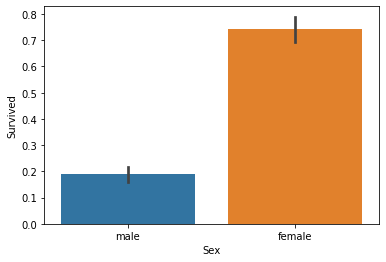

In [23]:
sns.barplot(x='Sex',y='Survived',data=t)

In [24]:
t[["Sex",'Pclass']].groupby(['Sex']).mean()

,Pclass
Sex,
female,2.159236
male,2.389948


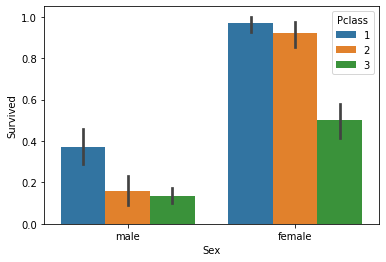

In [25]:
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=t)

In [26]:
t[['SibSp','Survived']].groupby(['SibSp']).mean()*100
#percentage of survivor travelling with sibling and spouce

,Survived
SibSp,
0,34.539474
1,53.588517
2,46.428571
3,25.000000
4,16.666667
5,0.000000
8,0.000000


In [27]:
t[['Parch','Survived']].groupby(['Parch']).mean()*100
#percentage of survivor travelling along parent/children

,Survived
Parch,
0,34.365782
1,55.084746
2,50.000000
3,60.000000
4,0.000000
5,20.000000
6,0.000000


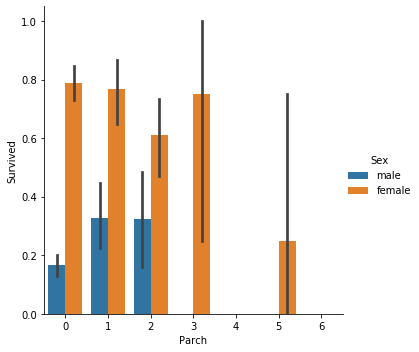

In [28]:
sns.catplot(x='Parch',y='Survived',hue='Sex',kind='bar',data=t)

In [29]:
t[['Pclass','Survived']].groupby(['Pclass']).mean()*100
#

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [30]:
t[['Fare','Pclass']].groupby(['Pclass']).median()

,Fare
Pclass,
1,60.2875
2,14.2500
3,8.0500


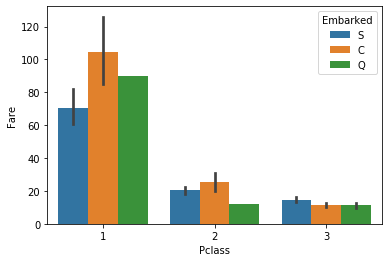

In [31]:
sns.barplot(y='Fare',x='Pclass',hue='Embarked',data=t)

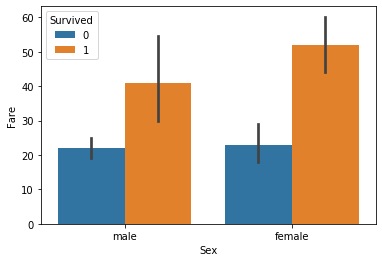

In [32]:
sns.barplot(x='Sex',y='Fare',hue='Survived',data=t)
# % of survival high with high price paid

In [33]:
#survival  % of traveller from diff cabin 
t[['Pclass','Survived']].groupby(['Pclass']).mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


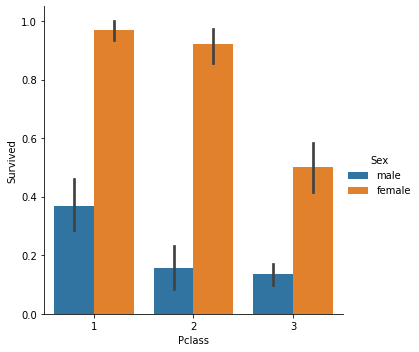

In [34]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=t,kind='bar')
#so 1 and 2 have higher survival rate

In [35]:
t['desg']=t.Name.str.extract('([A-Za-z]+)\.')
#here the algo will search for all string with values A to Z and  a to z 
#and + symbol is for continue search untill a . is found at the end

In [36]:
t['desg'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Don           1
Capt          1
Sir           1
Lady          1
Ms            1
Countess      1
Jonkheer      1
Name: desg, dtype: int64

In [37]:
t.drop(['Name','Ticket'],axis=1,inplace=True)

In [38]:
lenc=LabelEncoder()
t['Sex']=lenc.fit_transform(t['Sex'])
t['Embarked']=lenc.fit_transform(t['Embarked'])
t['desg']=lenc.fit_transform(t['desg'])

In [39]:
t

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,desg
0,0,3,1,22.000000,1,0,7.2500,2,12
1,1,1,0,38.000000,1,0,71.2833,0,13
2,1,3,0,26.000000,0,0,7.9250,2,9
3,1,1,0,35.000000,1,0,53.1000,2,13
4,0,3,1,35.000000,0,0,8.0500,2,12
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,15
887,1,1,0,19.000000,0,0,30.0000,2,9
888,0,3,0,29.699118,1,2,23.4500,2,9
889,1,1,1,26.000000,0,0,30.0000,0,12


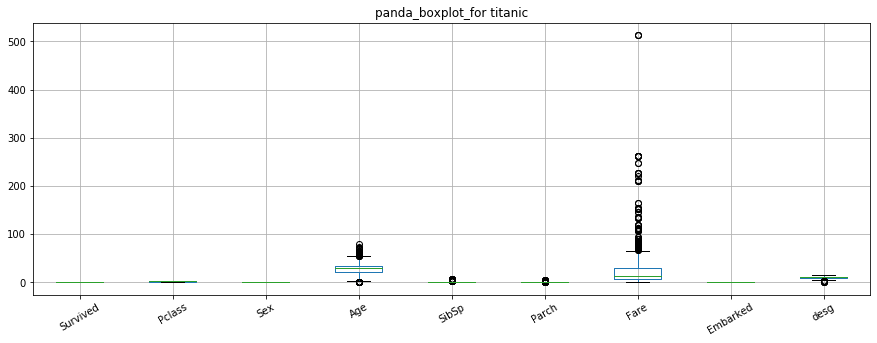

In [40]:
t.plot(kind='box',grid=True,title="panda_boxplot_for titanic",legend=True,rot=30,figsize=(15,5))

In [41]:
t1=t.columns.values
t1

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'desg'], dtype=object)

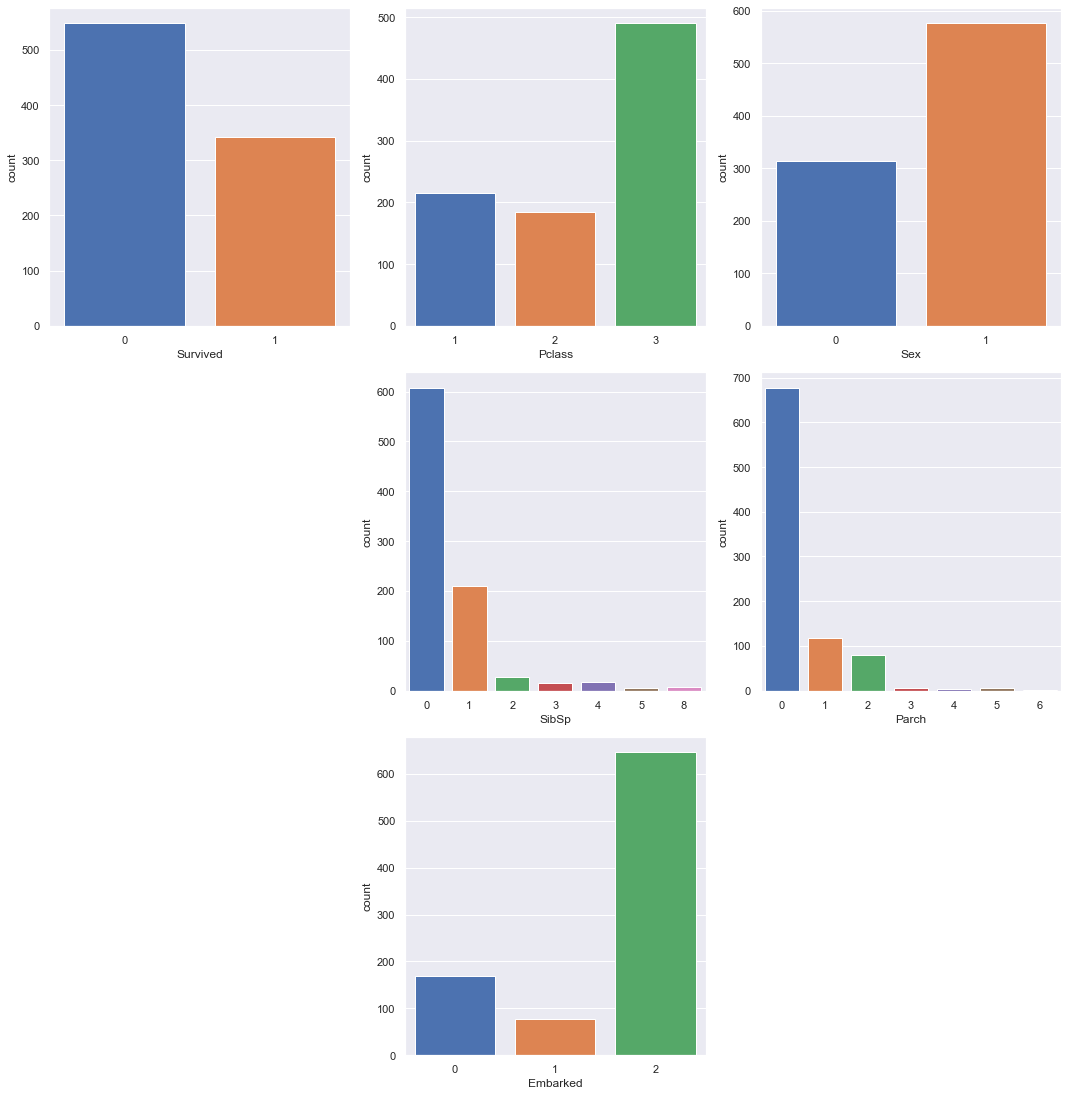

In [42]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,20))
for i in (0,1,2,4,5,7):
    plt.subplot(4,3,i+1)
    sns.countplot(t[t1[i]],saturation=9)

plt.tight_layout()

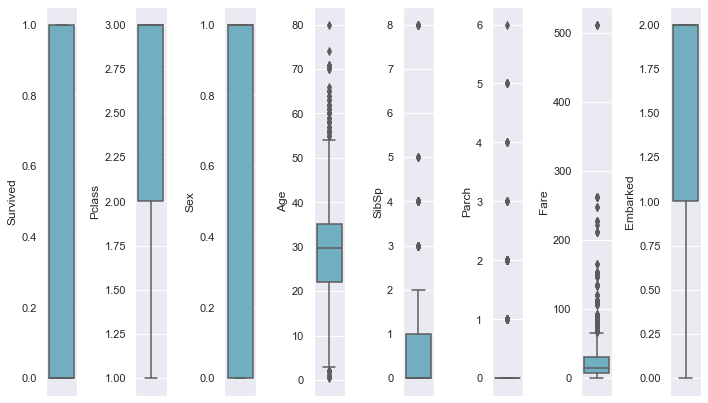

In [43]:
plt.figure(figsize=(10,56))
for i in range (0, 8):
    plt.subplot(10,8,i+1)
    sns.boxplot(t[t1[i]], color='c', orient='v')
    plt.tight_layout()

In [44]:
z=np.abs(zscore(t))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.50244517, 0.58595414,
        0.41788732],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.78684529, 1.9423032 ,
        0.95439683],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.48885426, 0.58595414,
        1.19164121],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 0.17626324, 0.58595414,
        1.19164121],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.04438104, 1.9423032 ,
        0.41788732],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.49237783, 0.67817453,
        0.41788732]])

In [45]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  30,  50,  59,  68,  71,  86,  88,  96, 116,
       118, 119, 159, 164, 167, 171, 180, 182, 201, 233, 245, 258, 261,
       266, 278, 299, 311, 317, 324, 341, 360, 377, 380, 386, 398, 437,
       438, 438, 480, 493, 527, 541, 542, 557, 567, 610, 630, 632, 638,
       647, 660, 672, 678, 679, 683, 686, 689, 694, 700, 716, 730, 736,
       737, 742, 745, 745, 759, 766, 774, 779, 787, 792, 796, 813, 822,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 8, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 8, 6, 4, 4, 4, 6, 6, 8, 4, 6, 5, 6, 6, 4, 8, 5, 5, 6, 4, 3, 6,
       4, 4, 6, 5, 5, 3, 8, 5, 8, 8, 3, 5, 6, 4, 4, 6, 8, 6, 6, 6, 5, 6,
       6, 3, 8, 8, 8, 5, 6, 4, 4, 8, 4, 8, 4, 4, 4, 3, 5, 4, 5],
      dtype=int64))


In [46]:
z[13][5]

5.73284383018578

In [47]:
titanic=t[(z<3).all(axis=1)]

In [48]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,desg
0,0,3,1,22.000000,1,0,7.2500,2,12
1,1,1,0,38.000000,1,0,71.2833,0,13
2,1,3,0,26.000000,0,0,7.9250,2,9
3,1,1,0,35.000000,1,0,53.1000,2,13
4,0,3,1,35.000000,0,0,8.0500,2,12
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,15
887,1,1,0,19.000000,0,0,30.0000,2,9
888,0,3,0,29.699118,1,2,23.4500,2,9
889,1,1,1,26.000000,0,0,30.0000,0,12


In [49]:
print('shape of titanic before z-score treatment', t.shape)
print('\n')
print('\n')
print('shape of titanic after z-score treatment', titanic.shape)

shape of titanic before z-score treatment (891, 9)




shape of titanic after z-score treatment (808, 9)


In [50]:
titanic.skew()

Survived    0.452531
Pclass     -0.669848
Sex        -0.651955
Age         0.320475
SibSp       1.982941
Parch       2.098010
Fare        2.348236
Embarked   -1.291739
desg       -0.941506
dtype: float64

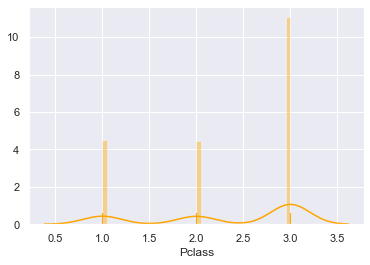

In [51]:
sns.distplot(titanic['Pclass'],bins=40,rug=True,color='orange')

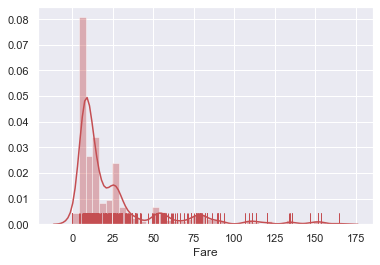

In [52]:
sns.distplot(titanic['Fare'],bins=40,rug=True,color='r')

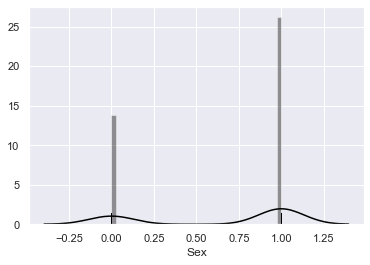

In [53]:
sns.distplot(titanic['Sex'],bins=40,rug=True,color='black')

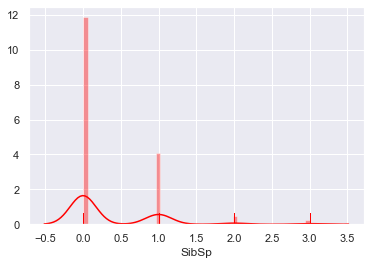

In [54]:
sns.distplot(titanic['SibSp'],bins=50,rug=True,color='red')

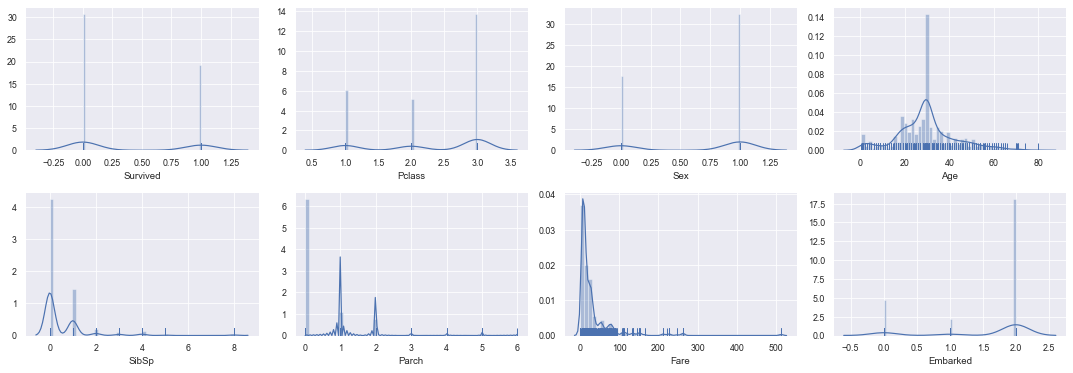

In [55]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
sns.set_context('paper')
for i in range (0, 8):
    plt.subplot(4,4,i+1)
    sns.distplot(t[t1[i]], color='B', bins=50,kde=True,rug=True)
    plt.tight_layout()

In [56]:
#not going to remove the skew of passengers
#but prices were too much skewed
titanic['Fare']=np.log1p(titanic['Fare'])


In [57]:
titanic.skew()

Survived    0.452531
Pclass     -0.669848
Sex        -0.651955
Age         0.320475
SibSp       1.982941
Parch       2.098010
Fare        0.235515
Embarked   -1.291739
desg       -0.941506
dtype: float64

In [58]:
for i in titanic.columns:
    if titanic.skew().loc[i]>0.55:
        titanic[i]=np.log1p(titanic[i])

In [59]:
titanic.skew()

Survived    0.452531
Pclass     -0.669848
Sex        -0.651955
Age         0.320475
SibSp       1.283488
Parch       1.808628
Fare        0.235515
Embarked   -1.291739
desg       -0.941506
dtype: float64

In [60]:
#bivariate analysis

Text(0, 0.5, 'Pclass')

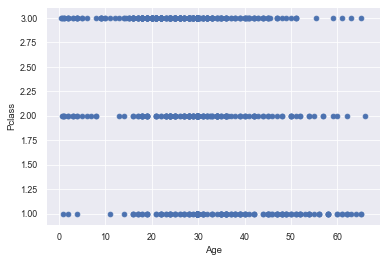

In [61]:
plt.scatter(x='Age',y='Pclass',data=titanic)
plt.xlabel('Age')
plt.ylabel('Pclass')

In [62]:
titan=titanic.corr()

In [63]:
titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,desg
Survived,1.000000,-0.326260,-0.556290,-0.095486,0.126017,0.209840,0.366467,-0.156816,-0.278326
Pclass,-0.326260,1.000000,0.147784,-0.314643,-0.091665,-0.090421,-0.704410,0.114842,-0.040527
Sex,-0.556290,0.147784,1.000000,0.090017,-0.214124,-0.255216,-0.277086,0.125713,0.378254
Age,-0.095486,-0.314643,0.090017,1.000000,-0.134353,-0.255235,0.135607,-0.006080,0.395494
SibSp,0.126017,-0.091665,-0.214124,-0.134353,1.000000,0.331719,0.377341,-0.038002,-0.059258
Parch,0.209840,-0.090421,-0.255216,-0.255235,0.331719,1.000000,0.325008,-0.023496,-0.236219
Fare,0.366467,-0.704410,-0.277086,0.135607,0.377341,0.325008,1.000000,-0.180909,-0.059896
Embarked,-0.156816,0.114842,0.125713,-0.006080,-0.038002,-0.023496,-0.180909,1.000000,0.074237
desg,-0.278326,-0.040527,0.378254,0.395494,-0.059258,-0.236219,-0.059896,0.074237,1.000000


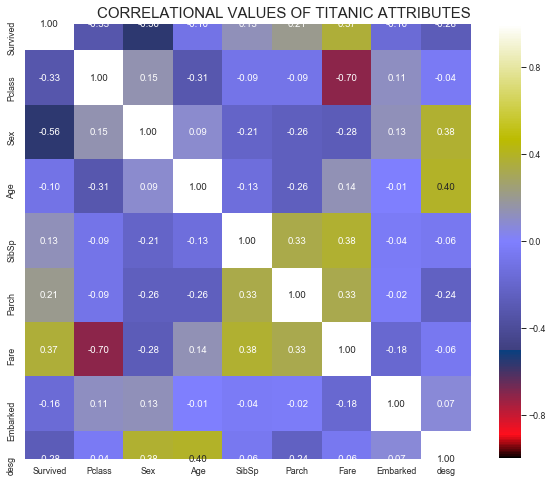

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(titan,cmap='gist_stern',cbar=True,fmt='.2f',annot=True,vmax=1,vmin=-1)
print('\n\n\n')
plt.title('CORRELATIONAL VALUES OF TITANIC ATTRIBUTES', size=15, loc='right')
plt.show()

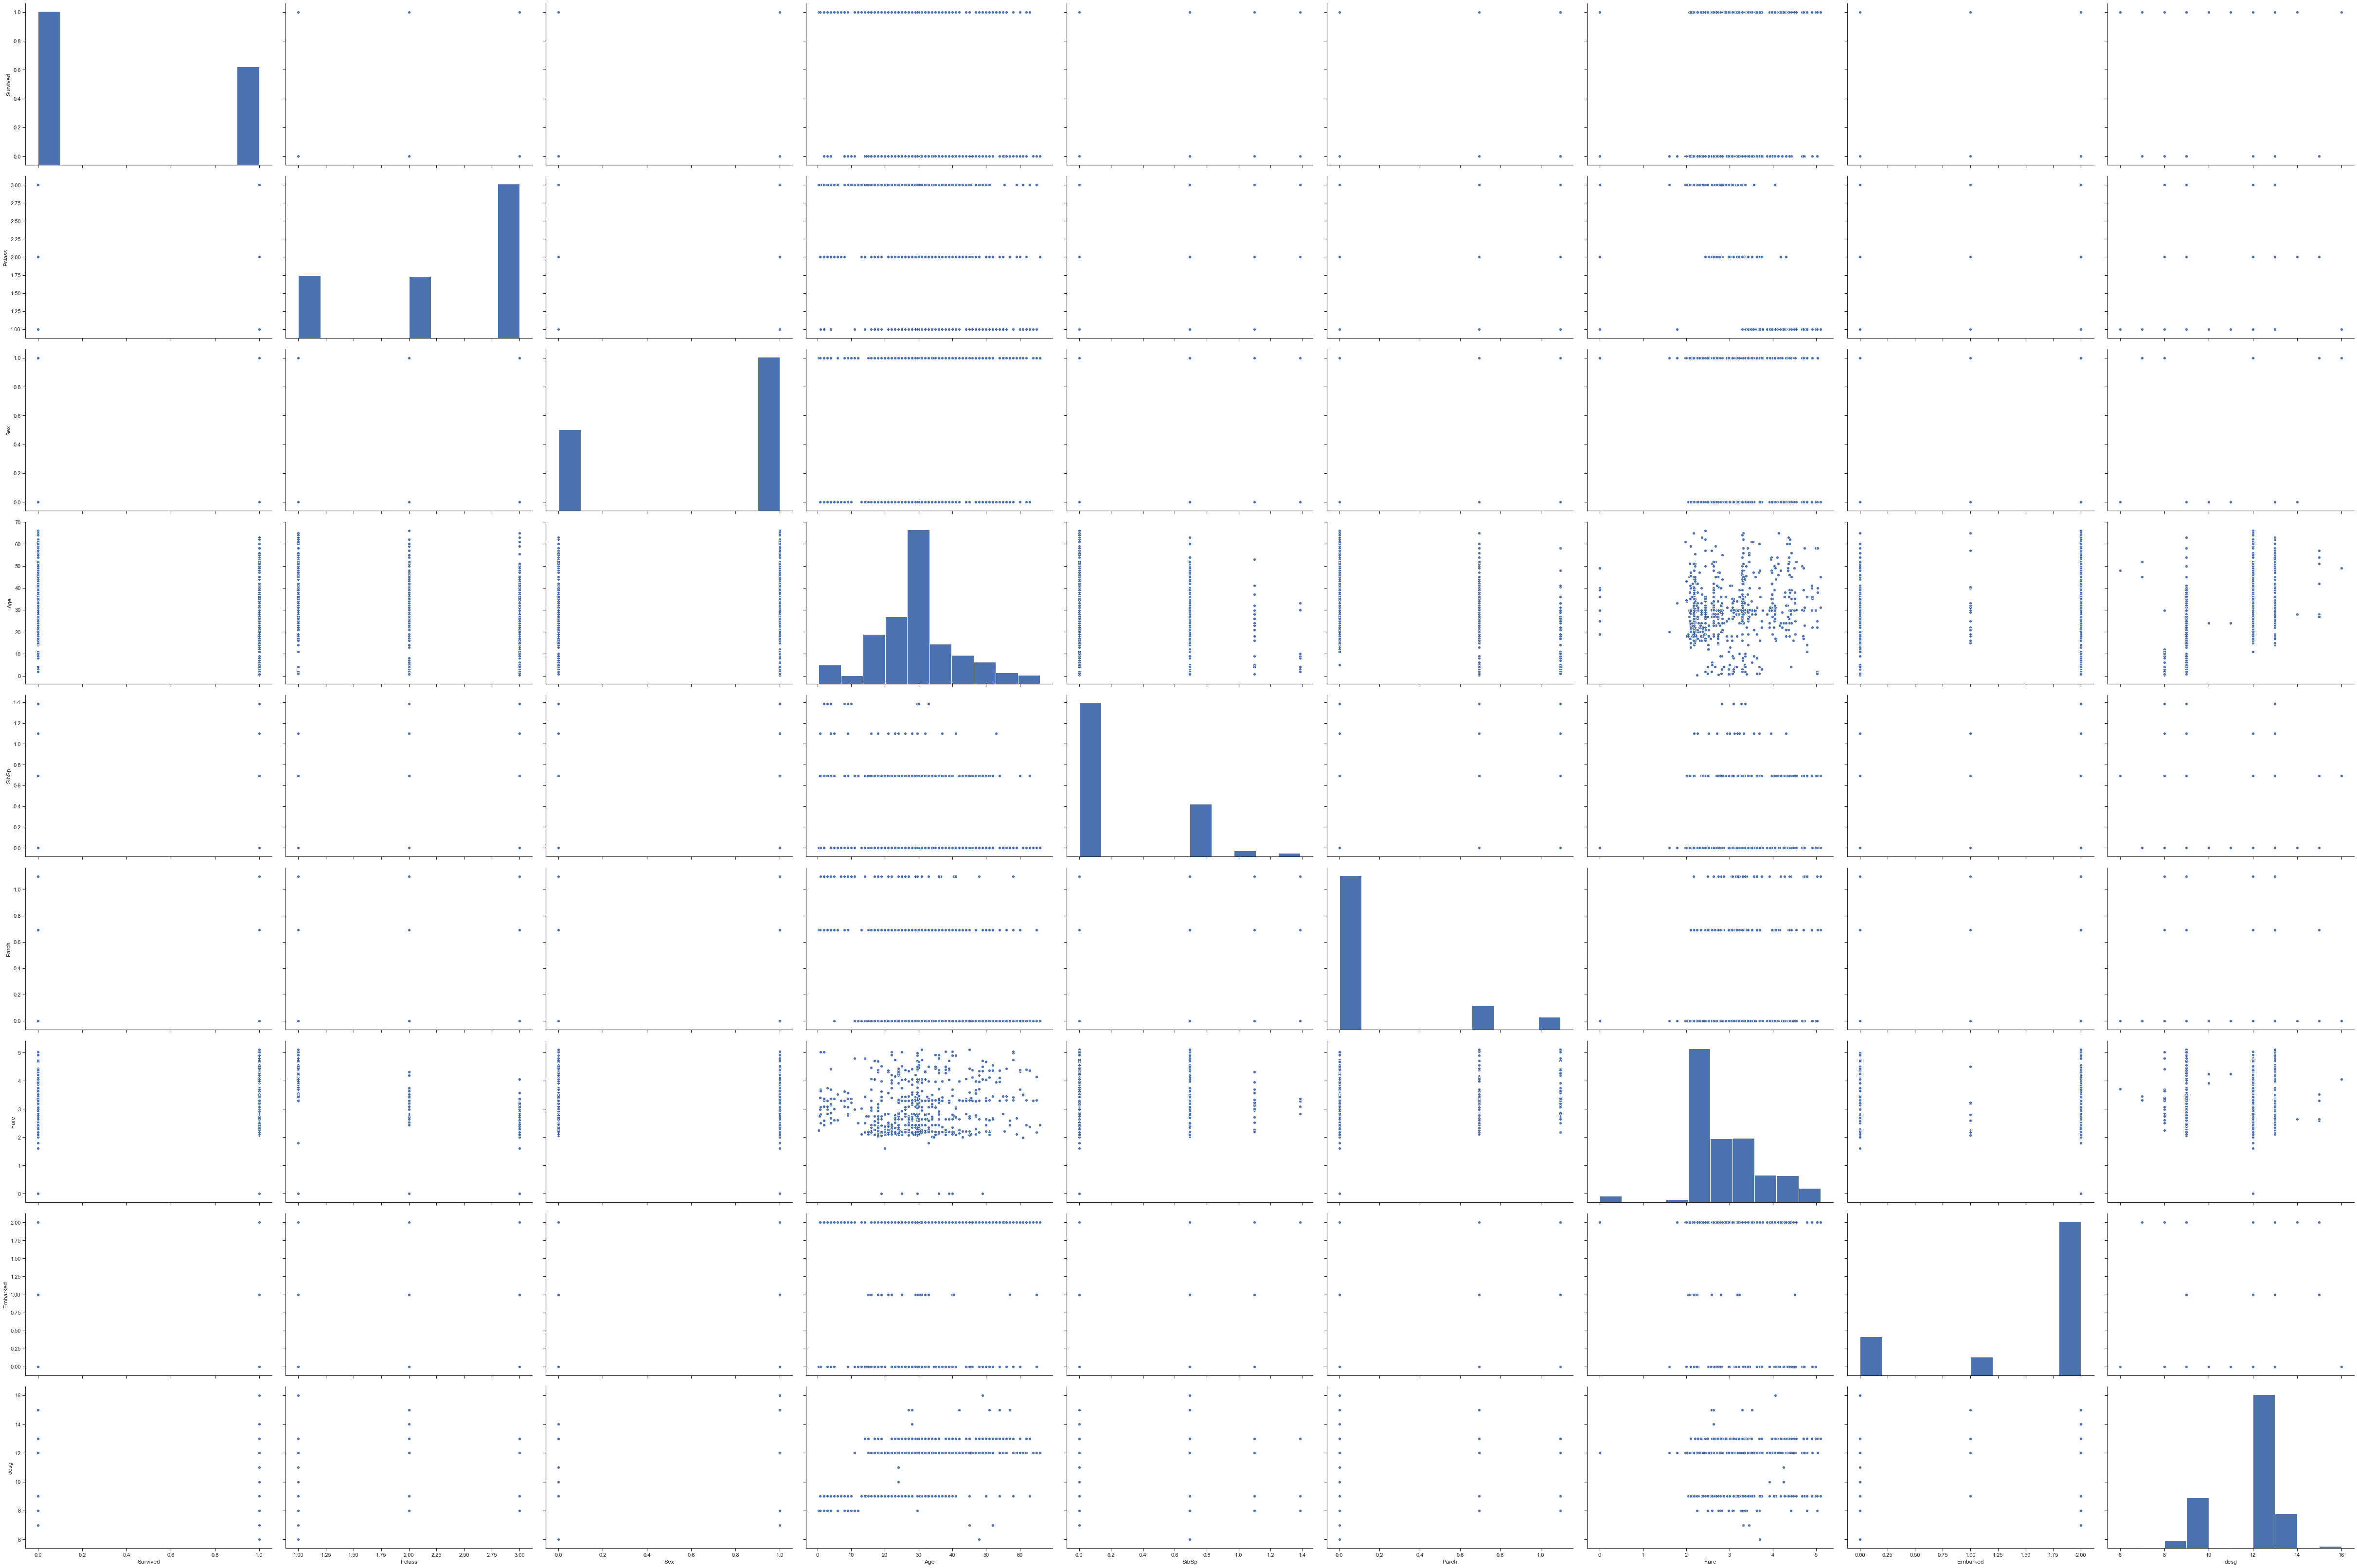

In [65]:
sns.set(style='ticks')
sns.pairplot(titanic,height=5,aspect=1.5)

In [66]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,desg
0,0,3,1,22.000000,0.693147,0.000000,2.110213,2,12
1,1,1,0,38.000000,0.693147,0.000000,4.280593,0,13
2,1,3,0,26.000000,0.000000,0.000000,2.188856,2,9
3,1,1,0,35.000000,0.693147,0.000000,3.990834,2,13
4,0,3,1,35.000000,0.000000,0.000000,2.202765,2,12
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.000000,0.000000,2.639057,2,15
887,1,1,0,19.000000,0.000000,0.000000,3.433987,2,9
888,0,3,0,29.699118,0.693147,1.098612,3.196630,2,9
889,1,1,1,26.000000,0.000000,0.000000,3.433987,0,12


In [67]:
x=titanic.iloc[:,1:9]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,desg
0,3,1,22.000000,0.693147,0.000000,2.110213,2,12
1,1,0,38.000000,0.693147,0.000000,4.280593,0,13
2,3,0,26.000000,0.000000,0.000000,2.188856,2,9
3,1,0,35.000000,0.693147,0.000000,3.990834,2,13
4,3,1,35.000000,0.000000,0.000000,2.202765,2,12
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0.000000,0.000000,2.639057,2,15
887,1,0,19.000000,0.000000,0.000000,3.433987,2,9
888,3,0,29.699118,0.693147,1.098612,3.196630,2,9
889,1,1,26.000000,0.000000,0.000000,3.433987,0,12


In [68]:
y=titanic.iloc[:,0]

In [69]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 808, dtype: int64

In [70]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [71]:
ss=StandardScaler()
x=ss.fit_transform(x)
x


array([[ 0.82046357,  0.72623013, -0.63069141, ..., -0.83878926,
         0.57990232,  0.38874249],
       [-1.62128437, -1.37697398,  0.69608121, ...,  1.60474547,
        -1.96662526,  1.04449182],
       [ 0.82046357, -1.37697398, -0.29899825, ..., -0.75024844,
         0.57990232, -1.57850551],
       ...,
       [ 0.82046357, -1.37697398,  0.00774475, ...,  0.38435959,
         0.57990232, -1.57850551],
       [-1.62128437,  0.72623013, -0.29899825, ...,  0.65158933,
        -1.96662526,  0.38874249],
       [ 0.82046357,  0.72623013,  0.19854148, ..., -0.77254335,
        -0.69336147,  0.38874249]])

In [72]:
x.shape

(808, 8)

In [73]:
y=np.array(y)


In [74]:
y.shape

(808,)

In [75]:
y=y.reshape(-1,1)
y.shape

(808, 1)

In [76]:
#function to create best random_state
def acusr(model,x,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        ascr=accuracy_score(pred,y_test)
        f1=f1_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
   
        if ascr>max_ac_score:
            max_ac_score=ascr
            final_rst=rst
    print('best suited random_score is: ', final_rst, 'with an accuracy score of: ', max_ac_score)
    print('f1_score:', f1)
    print('confusion matrix:')
    print(conf)
    return final_rst

In [77]:
lrg=LogisticRegression()
lrgm=acusr(lrg,x,y)

best suited random_score is:  25 with an accuracy score of:  0.8303886925795053
f1_score: 0.7168141592920354
confusion matrix:
[[138  22]
 [ 42  81]]


In [78]:
#check for fitting
acu_scr1=cross_val_score(lrg,x,y,scoring='accuracy',cv=10).mean()

In [79]:
acu_scr1

0.7797783047274918

In [80]:
#finding best parameter for knc
knr=KNeighborsClassifier()
kparam={'n_neighbors':range(1,30),'leaf_size':range(20,70)}
gknr=GridSearchCV(knr,kparam,cv=15)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 5}

In [81]:
knr=KNeighborsClassifier(n_neighbors=5)
knrm=acusr(knr,x,y)


best suited random_score is:  151 with an accuracy score of:  0.8586572438162544
f1_score: 0.7387387387387387
confusion matrix:
[[143  17]
 [ 41  82]]


In [82]:
#fitting check
acu_scr2=cross_val_score(knr,x,y,scoring='accuracy',cv=10)
print('mean accuracy score for knr:', acu_scr2.mean())

mean accuracy score for knr: 0.8294561126166817


In [83]:
#finding best parameter for decesion tres


In [84]:
dtc=DecisionTreeClassifier()
dtpar={'criterion':['gini','entropy'],'max_depth':range(3,10)}
gdtc=GridSearchCV(dtc,dtpar,cv=15)
gdtc.fit(x,y)
gdtc.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [85]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtcm=acusr(dtc,x,y)

best suited random_score is:  133 with an accuracy score of:  0.8515901060070671
f1_score: 0.7019230769230769
confusion matrix:
[[148  12]
 [ 50  73]]


In [86]:
acu_scr3=cross_val_score(dtc,x,y,scoring='accuracy',cv=10)
print('mean accuracy score for dtc:', acu_scr3.mean())

mean accuracy score for dtc: 0.8071540951520626


In [87]:
gnb=GaussianNB()
gnbm=acusr(gnb,x,y)

best suited random_score is:  25 with an accuracy score of:  0.8409893992932862
f1_score: 0.7053941908713693
confusion matrix:
[[127  33]
 [ 38  85]]


In [88]:
#fitting check
acu_scr4=cross_val_score(gnb,x,y,scoring='accuracy',cv=10)
print('mean accuracy score for gnb:', acu_scr4.mean())

mean accuracy score for gnb: 0.7922312556458898


In [89]:
#finding parameter for svc

In [90]:
svc=SVC()
svpa={'kernel':('rbf','linear','poly'),'degree':range(3,8)}
gdsvc=GridSearchCV(svc,svpa,cv=15)
gdsvc.fit(x,y)
gdsvc.best_params_

{'degree': 3, 'kernel': 'rbf'}

In [91]:
svc=SVC(kernel='rbf',degree=3)
svcm=acusr(svc,x,y)

best suited random_score is:  151 with an accuracy score of:  0.8657243816254417
f1_score: 0.7321428571428571
confusion matrix:
[[141  19]
 [ 41  82]]


In [92]:
#checking for fit

In [93]:
acu_scr5=cross_val_score(svc,x,y,scoring='accuracy',cv=10)
print('mean accuracy score at svc: ', acu_scr5.mean())

mean accuracy score at svc:  0.8304313459801265


In [94]:
#boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)

para= {"learning_rate": [0.0001,0.025,0.1,1.0], "n_estimators":[250,500,750,1000]}

gbgs= GridSearchCV(gbc,para,cv=15)
gbgs.fit(x_train,y_train)
print("best parameters:", gbgs.best_params_)
print("\n best score:",gbgs.best_score_)

C:\Users\mishr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameters: {'learning_rate': 0.025, 'n_estimators': 250}

 best score: 0.8096118299445472


In [95]:
gbc=GradientBoostingClassifier(learning_rate=0.025, n_estimators= 250)
model6=acusr(gbc,x,y)

best suited random_score is:  58 with an accuracy score of:  0.8692579505300353
f1_score: 0.7239819004524887
confusion matrix:
[[142  18]
 [ 43  80]]


In [96]:
acu_scr6=cross_val_score(gbc,x,y,scoring='accuracy',cv=10)
print('mean accuracy score at gbc: ', acu_scr6.mean())

mean accuracy score at gbc:  0.8205521680216803


In [100]:
#finalization of model

In [101]:
#basing on the scores svc has the highest performance

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=151)
svc=SVC(kernel='rbf',degree=3)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
ascr=accuracy_score(pred,y_test)
f1=f1_score(pred,y_test)
clr=classification_report(y_test,pred)
conf=confusion_matrix(y_test,pred)
print('accuracy score: ', ascr)
print('f1_score:', f1)
print('confusion matrix:\n',conf)
print('classification report:\n', clr)

accuracy score:  0.8657243816254417
f1_score: 0.8137254901960784
confusion matrix:
 [[162  18]
 [ 20  83]]
classification report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       180
           1       0.82      0.81      0.81       103

    accuracy                           0.87       283
   macro avg       0.86      0.85      0.85       283
weighted avg       0.87      0.87      0.87       283



In [108]:
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [119]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [110]:
fpr,tpr,thresholds=roc_curve(y_test,pred)

In [111]:
fpr

array([0. , 0.1, 1. ])

In [112]:
tpr

array([0.        , 0.80582524, 1.        ])

In [113]:
thresholds

array([2, 1, 0], dtype=int64)

In [118]:
scoring=roc_auc_score(y_test,pred)
scoring

0.8529126213592234

In [120]:
roc_auc=auc(fpr,tpr)
roc_auc

0.8529126213592234

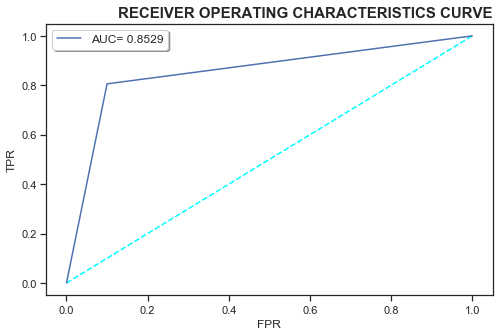

In [128]:
plt.figure(figsize=(8,5))
plt.plot([0,1],[0,1],color='cyan',linestyle="--")
plt.plot(fpr,tpr,label="AUC= %0.4f" % roc_auc)
plt.legend(loc='best',fontsize='medium',shadow=True)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
plt.show()

In [ ]:
#dumping the model

In [130]:
import joblib

In [131]:
joblib.dump(svc,"SVC_TITANIC.pkl")

['SVC_TITANIC.pkl']